# Sampling from a probability distribution

The following exercise involved sampling, i.e. generating a sample, from a probability distribution $f(x)$, both in case $f(x)$, $F(x)$, and $F^{-1}(x)$ is known, and in case $f(x)$ is unknown, but where an algorithm exists that can evaluate $f(x)$ for any value of $x$.


## 1. Inverse transform sampling  using $F^{-1}$ / The inversion method

### 1A Inverse sampling of a Gaussian distribution

Consider the 1D Gaussian distribution $N(8,3)$. Use Inverse Transform sampling (the 'inversion'  method) to generate a sample, $\mathbf{x}^*$, consisting of 10000 realizations of $f(x)$~$N(8,3)$.

In [1]:
import matplotlib.pyplot  as plt
import numpy              as np
import scipy              as sp
#import time               as time
#import random             as random

#from scipy.stats         import norm, invgauss
#from scipy.interpolate   import interp1d

In [2]:
mu  = 8.
var = 3.
s   = np.sqrt(var)

N   = 10000                 # How many realisations (sample size)
M   = 1                   # How many 'chains'

p   = np.random.rand(M,N)   # (M x N)-matrix, containing random numbers between 0 and 1
m   = sp.stats.norm.ppf(p,mu,s)      # 'Inversion method' applied on p


means = np.mean(m, axis=0)
stdevs = np.std(m, axis=0)

# compute mean as a function of sample size
m_mean = m*0
m_std = m*0
for j in range(M):
    for i in range(N):
        m_mean[j,i]=np.mean(m[j,0:i])
        m_std[j,i]=np.std(m[j,0:i])



/home/au11687/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/au11687/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/au11687/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/au11687/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/au11687/miniconda3/envs/tf/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'Iteration Number')

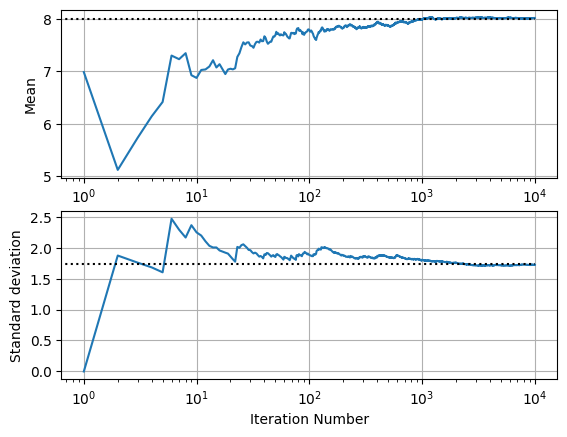

In [3]:
plt.subplot(2,1,1)
plt.semilogx(m_mean.T)
plt.plot([0,N],[mu,mu],'k:')
plt.ylabel('Mean')
plt.grid()
plt.subplot(2,1,2)
plt.semilogx(m_std.T)
plt.plot([0,N],[s,s],'k:')
plt.grid()
plt.ylabel('Standard deviation')
plt.xlabel('Iteration Number')


### Compute the probability that $x$ is larger than 13, i.e. $P(x>13)$.

In [4]:
# Compuer ratio of entries on m larger than 13
P_13 = ratio = np.sum(m>13)/m.size
print('P(m>13) =',P_13)


P(m>13) = 0.0021


## 1B 